In [ ]:
!pip install ultralytics

In [2]:
!apt-get install ffmpeg

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [3]:
import os
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
ROOT_DIR = '/content/gdrive/MyDrive/data'

In [6]:
model_path = os.path.join(ROOT_DIR, 'results_on_200_epochs', 'runs', 'detect', 'train', 'weights', 'best.pt')
model = YOLO(model_path)

In [7]:
video_path = os.path.join(ROOT_DIR, 'videos', 'VID_20230716_200632.mp4')
video_path_out = os.path.join(ROOT_DIR, 'output_video', 'VID_20230716_200632_3.avi')

In [ ]:
no_of_shrimps = []

cap = cv2.VideoCapture(video_path)

fps = int(cap.get(cv2.CAP_PROP_FPS)/2)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter(video_path_out, fourcc, fps, (width, height))

while True:
  ret, frame = cap.read()

  if frame is None:
    break

  threshold = 0.2

  results = model(frame)[0]
  count=0

  for result in results.boxes.data.tolist():
    x1, y1, x2, y2, score, class_id = result

    if score > threshold:
        cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 4)
        cv2.putText(frame, results.names[int(class_id)].upper(), (int(x1), int(y1 - 10)), cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 255, 0), 3, cv2.LINE_AA)

        count = count + 1

  cv2.putText(frame, "Total No of Shrimps are: " + str(count), (100, 100), cv2.FONT_HERSHEY_SIMPLEX, 1.4, (0, 0, 255), 2, cv2.LINE_AA)
  no_of_shrimps.append(count)
  out.write(frame)
  ret, frame = cap.read()

cap.release()
out.release()
cv2.destroyAllWindows()

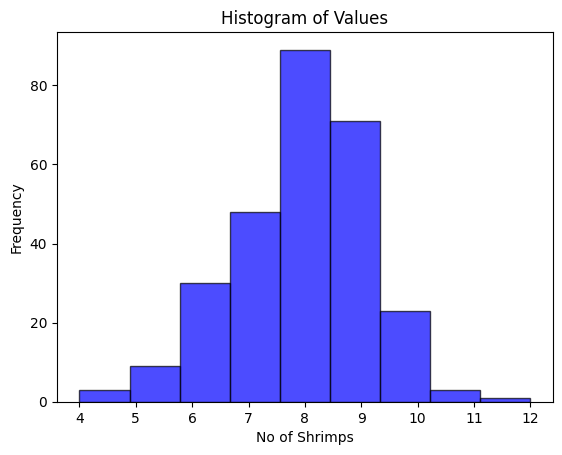

In [9]:
plt.hist(no_of_shrimps, bins=len(set(no_of_shrimps)), alpha=0.7, color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('No of Shrimps')
plt.ylabel('Frequency')
plt.title('Histogram of Values')

# Show the histogram
plt.show()